Решение задачи 2 по физико-химической гидрогеодинамике с помощью численного расчета преобразования Лапласа-Карсона

In [467]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import stats
from scipy.optimize import curve_fit
from scipy.special import erfc

In [505]:
bound = 0.08# g/l
x = 1.2 #meters
num_data_points = 13 # number of data points including initial conditions
list1 = [11,10.10,8.79,7.34,5.85,4.51,3.38,2.47,1.75,1.28,0.90,0.64,0.44]
#data = np.array(list)
# Create DataFrame 
df = pd.DataFrame({'TimeDays': np.linspace(0,num_data_points-1,num_data_points), 'C, g/l':list1}) 
for i in range(13,1000):
#    print(i)
    df.loc[i] = [i,0.08]
df['c^'] = (df['C, g/l']-df['C, g/l'].max())/(bound-df['C, g/l'].max())

# Print the output. 
df 

,TimeDays,"C, g/l",c^
0,0.0,11.00,-0.000000
1,1.0,10.10,0.082418
2,2.0,8.79,0.202381
3,3.0,7.34,0.335165
4,4.0,5.85,0.471612
...,...,...,...
8,8.0,1.75,0.847070
9,9.0,1.28,0.890110
10,10.0,0.90,0.924908
11,11.0,0.64,0.948718


In [501]:
pd.set_option('display.max_rows', 11)
df 

,TimeDays,"C, g/l",c^
0,0.0,11.00,-0.000000
1,1.0,10.10,0.082418
2,2.0,8.79,0.202381
3,3.0,7.34,0.335165
4,4.0,5.85,0.471612
...,...,...,...
8,8.0,1.75,0.847070
9,9.0,1.28,0.890110
10,10.0,0.90,0.924908
11,11.0,0.64,0.948718


Text(0, 0.5, 'Концентрация, [-]')

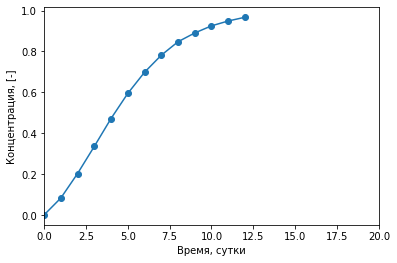

In [508]:
fig, ax= plt.subplots()
ax.plot(df['TimeDays'],df['c^'], 'o-')
ax.set_xlabel('Время, сутки')
ax.set_xlim(0,20)
ax.set_ylabel('Концентрация, [-]')

In [442]:
s = 8# number of p
power = 1/(s-1)
q = pow(((14/20)*(5/14)), power)
q = round(q,2)
t_C_max = 14# time of max concentration
tmax = t_C_max/5
tmax = round(tmax,2)

t = [tmax  *q**i for i in range(s)]
t_rounded = [round(num, 1) for num in t]
p = [1/i for i in t]
p
#p = [0.5,0.55,0.6,0.8]
#p = [1/7,0.2,0.3,0.8]
#for x in p:
#    print(x)
#p = [0.357,0.556,1,1.429] 

[0.35714285714285715,
 0.4355400696864112,
 0.531146426446843,
 0.6477395444473695,
 0.7899262737163043,
 0.9633247240442737,
 1.17478624883448,
 1.4326661571152197]

In [443]:
tmax

2.8

exponent = 0      -0.000000
1       0.057665
2       0.099074
3       0.114800
4       0.113022
          ...   
9995    0.000000
9996    0.000000
9997    0.000000
9998    0.000000
9999    0.000000
Name: laplace, Length: 10000, dtype: float64
p = 0.35714285714285715 int = 0.2873319178911283
exponent = 0      -0.000000
1       0.053317
2       0.084696
3       0.090740
4       0.082599
          ...   
9995    0.000000
9996    0.000000
9997    0.000000
9998    0.000000
9999    0.000000
Name: laplace, Length: 10000, dtype: float64
p = 0.4355400696864112 int = 0.23748495958724355
exponent = 0      -0.000000
1       0.048456
2       0.069955
3       0.068114
4       0.056349
          ...   
9995    0.000000
9996    0.000000
9997    0.000000
9998    0.000000
9999    0.000000
Name: laplace, Length: 10000, dtype: float64
p = 0.531146426446843 int = 0.19299798832899667
exponent = 0      -0.000000
1       0.043123
2       0.055405
3       0.048010
4       0.035346
          ...   
9995    0.00

[0, 20, 0, 0.1]

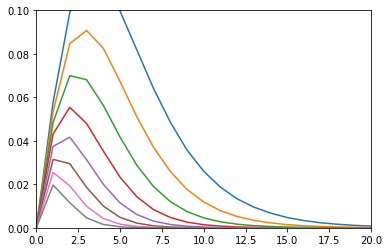

In [457]:
integrated = []
for count in p:
    exp_ = np.exp((-count)*df['TimeDays'])
    df['laplace'] = df['c^']*exp_
    print('exponent = ' + str(df['laplace']))
    plt.plot(df['laplace'])
    
    #df
    #s = df.apply(lambda g: integrate.trapz(df['laplace'], x=df['TimeDays']))
    s = integrate.trapz(df['laplace'], x=df['TimeDays'])
#    s = integrate.simps(df['laplace'], x=df['TimeDays'], even='avg')
    s = s*count
    integrated.append(s)
    print('p = ' +str(count) +' int = '+ str(s))
integrated
plt.axis([0, 20, 0, 0.1])

In [458]:
df_final = pd.DataFrame({'p, days^-1':p, 'U^':integrated}) 
df_final

,"p, days^-1",U^
0,0.357143,0.287332
1,0.435540,0.237485
2,0.531146,0.192998
3,0.647740,0.154370
4,0.789926,0.121643
5,0.963325,0.094480
6,1.174786,0.072282
7,1.432666,0.054330


In [459]:
df_final['a,m-1'] = -1/1.2*np.log(df_final['U^'])
df_final['p/a'] =df_final['p, days^-1']/df_final['a,m-1'] 
df_final

,"p, days^-1",U^,"a,m-1",p/a
0,0.357143,0.287332,1.039264,0.343650
1,0.435540,0.237485,1.198042,0.363543
2,0.531146,0.192998,1.370896,0.387445
3,0.647740,0.154370,1.557004,0.416017
4,0.789926,0.121643,1.755554,0.449958
5,0.963325,0.094480,1.966143,0.489956
6,1.174786,0.072282,2.189317,0.536599
7,1.432666,0.054330,2.427239,0.590245


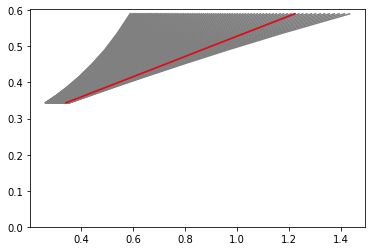

In [460]:
r2 = []
listofslopes = []
listofintercepts = []
fig, ax1= plt.subplots()
A3 = np.linspace(0,1,101)
df_results = pd.DataFrame({'A3': A3 , 'R2':''}) 
for count1 in A3:
    df_final['result'] = (df_final['p, days^-1'].round(3)/(1+count1*df_final['p, days^-1'].round(3))).round(3)
    df_final['result'] = df_final['result'].round(3)
    ax1.plot(df_final['result'].round(3),df_final['p/a'], '-', color = 'gray')
    slope, intercept, r_value, _, _ = stats.linregress(df_final['result'].round(3),df_final['p/a'])
    r2.append(r_value**2)
    listofintercepts.append(intercept)
    listofslopes.append(slope)
df_results['R2'] = r2
df_results['slope'] = listofslopes
df_results['intercept'] = listofintercepts
df_results
slope1 = df_results['slope'].loc[df_results['R2'].idxmax()]
intercept1 = df_results['intercept'].loc[df_results['R2'].idxmax()]
ax1.plot((df_final['p/a']-intercept1)/slope1,df_final['p/a'])
#intercepty = slope1*0+intercept1
ax1.set_ylim(bottom = 0)
A3_res = df_results['A3'].loc[df_results['R2'].idxmax()]
df_final['result'] = df_final['p, days^-1']/(1+A3_res*df_final['p, days^-1'])
df_final['result'] = df_final['result'].round(3)
ax1.plot(df_final['result'].round(3),df_final['p/a'], '-', color = 'red')

In [461]:
df_results.loc[df_results['R2'].idxmax()]

A3           0.120000
R2           0.999994
slope        0.280375
intercept    0.247620
Name: 12, dtype: float64

In [462]:
df_final['result'] = df_final['p, days^-1'].round(3)/(1+0.2*df_final['p, days^-1'].round(3))
#df_final['result'] = df_final['result'].round(3)
#slope, intercept, r_value, _, _ = stats.linregress(df_final['result'].round(3),df_final['p/a'].round(3))
df_final['result']
#A3_res = 0.05
#r_value**2

0    0.333209
1    0.401030
2    0.480022
3    0.573654
4    0.682211
5    0.807479
6    0.951417
7    1.113788
Name: result, dtype: float64

In [463]:
v = 0.1
n = v/intercept1
k = intercept1*A3_res/(slope1+A3_res)
alpha = k*(1-k)*n/A3_res
print('n = '+ str(n))
print('k = ' +str(k))
print('alpha = '+str(alpha))

n = 0.4038444821912062
k = 0.07421652153507487
alpha = 0.2312293343332702


In [401]:
round(0.342334, 2)

0.34

In [451]:
pd.set_option('display.max_rows', 101)
df_results


,A3,R2,slope,intercept
0,0.00,0.998917,0.236728,0.264186
1,0.01,0.999101,0.240934,0.262633
2,0.02,0.999308,0.245081,0.261188
3,0.03,0.999444,0.249378,0.259596
4,0.04,0.999558,0.253849,0.257931
5,0.05,0.999672,0.258039,0.256476
6,0.06,0.999737,0.262304,0.254988
7,0.07,0.999850,0.266639,0.253539
8,0.08,0.999891,0.270854,0.252169
9,0.09,0.999944,0.275480,0.250450


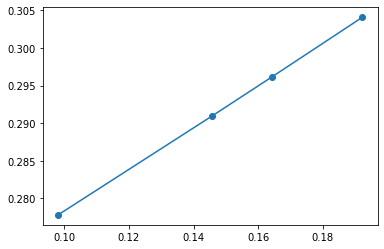

In [333]:
plt.plot(df_final['result'],df_final['p/a'],'o-')

In [182]:
pd.set_option('display.max_rows', 10)
df_results

,A3,R2,slope,intercept
0,0.00,0.998985,0.229330,0.264623
1,0.01,0.999140,0.233496,0.263126
2,0.02,0.999317,0.237645,0.261775
3,0.03,0.999466,0.241834,0.260282
4,0.04,0.999576,0.245938,0.258862
...,...,...,...,...
96,0.96,0.985923,0.727800,0.139453
97,0.97,0.985862,0.731430,0.139336
98,0.98,0.985415,0.738434,0.137963
99,0.99,0.985373,0.744908,0.136290


In [206]:
v = 0.1
n = v/intercept1
k = intercept1*A3_res/(slope1+A3_res)
alpha = k*(1-k)*n/A3_res
print('n = '+ str(n))
print('k = ' +str(k))
print('alpha = '+str(alpha))

n = 0.401058254853647
k = 0.06667859929491535
alpha = 0.24958883388974262


In [332]:
0.0868526565612364*(1-0.0868526565612364)*0.4485852957692019/A3_res

0.1111780422211543

In [205]:
df_final['p/a'] = [0.344,0.398,0.513,]

In [206]:
df_final['p/a']

0    0.344
1    0.398
2    0.513
3    0.622
Name: p/a, dtype: float64

In [ ]:
n = 0.4036690021448831
k = 0.07427333511390906
alpha = 0.23129159661357615

In [496]:
v = 0.1 
x = 1.2
time = df['TimeDays'].to_numpy()
xdata = df['c^'].to_numpy()

In [506]:
def func(time, n,alpha):
    result = []
    result_list = []
    
#    print(chislitel)
    t0 = 0
#    t0 = n*x/v
    for t in time:
        if t0<t:
            chislitel = v*t - x*n
            znamenatel = 2*np.sqrt(v**2/alpha*(1-t0/t)*n*t)
            result = 1 - 0.5*erfc(chislitel/znamenatel)
            
        else:
            result = 0
#        print(result)
        result_list.append(result)
    return result_list

In [507]:
popt, pcov = curve_fit(func, time, xdata, p0 = [ 0.42335248, 0.48221169], bounds=(0, [1., 0.5]))
popt

array([0.3334525 , 0.31591362])

[0, 15, 0, 1.1]

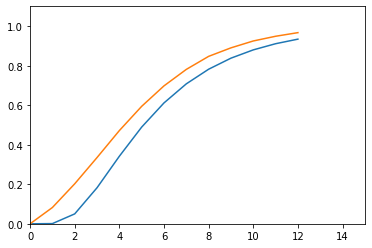

In [504]:
plt.plot(time, func(time, 0.42335248, 0.48221169))
plt.plot(time, xdata)
plt.axis([0, 15, 0, 1.1])

In [502]:
df['TimeDays']

0      0.0
1      1.0
2      2.0
3      3.0
4      4.0
      ... 
8      8.0
9      9.0
10    10.0
11    11.0
12    12.0
Name: TimeDays, Length: 13, dtype: float64

In [503]:
df['c^']

0    -0.000000
1     0.082418
2     0.202381
3     0.335165
4     0.471612
        ...   
8     0.847070
9     0.890110
10    0.924908
11    0.948718
12    0.967033
Name: c^, Length: 13, dtype: float64